importing

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Read the data 

In [11]:
df = pd.read_excel('/Users/aalaaseif/Documents/ITI/DEP/Tasks/IPEDS_data.xlsx')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Columns: 145 entries, ID number to Endowment assets (year end) per FTE enrollment (FASB)
dtypes: float64(116), int64(2), object(27)
memory usage: 1.7+ MB


In [13]:
df.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


Exploratory Data Analysis (EDA) and Visualization

In [14]:
df.isnull().sum()

ID number                                                   0
Name                                                        0
year                                                        0
ZIP code                                                    0
Highest degree offered                                      0
                                                         ... 
Percent of freshmen receiving student loan aid             42
Percent of freshmen receiving federal student loans        42
Percent of freshmen receiving other loan aid               42
Endowment assets (year end) per FTE enrollment (GASB)    1018
Endowment assets (year end) per FTE enrollment (FASB)     574
Length: 145, dtype: int64

In [15]:
ls=df.columns.tolist()
print(ls)

['ID number', 'Name', 'year', 'ZIP code', 'Highest degree offered', 'County name', 'Longitude location of institution', 'Latitude location of institution', 'Religious affiliation', 'Offers Less than one year certificate', 'Offers One but less than two years certificate', "Offers Associate's degree", 'Offers Two but less than 4 years certificate', "Offers Bachelor's degree", 'Offers Postbaccalaureate certificate', "Offers Master's degree", "Offers Post-master's certificate", "Offers Doctor's degree - research/scholarship", "Offers Doctor's degree - professional practice", "Offers Doctor's degree - other", 'Offers Other degree', 'Applicants total', 'Admissions total', 'Enrolled total', 'Percent of freshmen submitting SAT scores', 'Percent of freshmen submitting ACT scores', 'SAT Critical Reading 25th percentile score', 'SAT Critical Reading 75th percentile score', 'SAT Math 25th percentile score', 'SAT Math 75th percentile score', 'SAT Writing 25th percentile score', 'SAT Writing 75th pe

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_12354/2961479636.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Universities', y='Degree', data=degree_freq, palette=palette, edgecolor='gray')


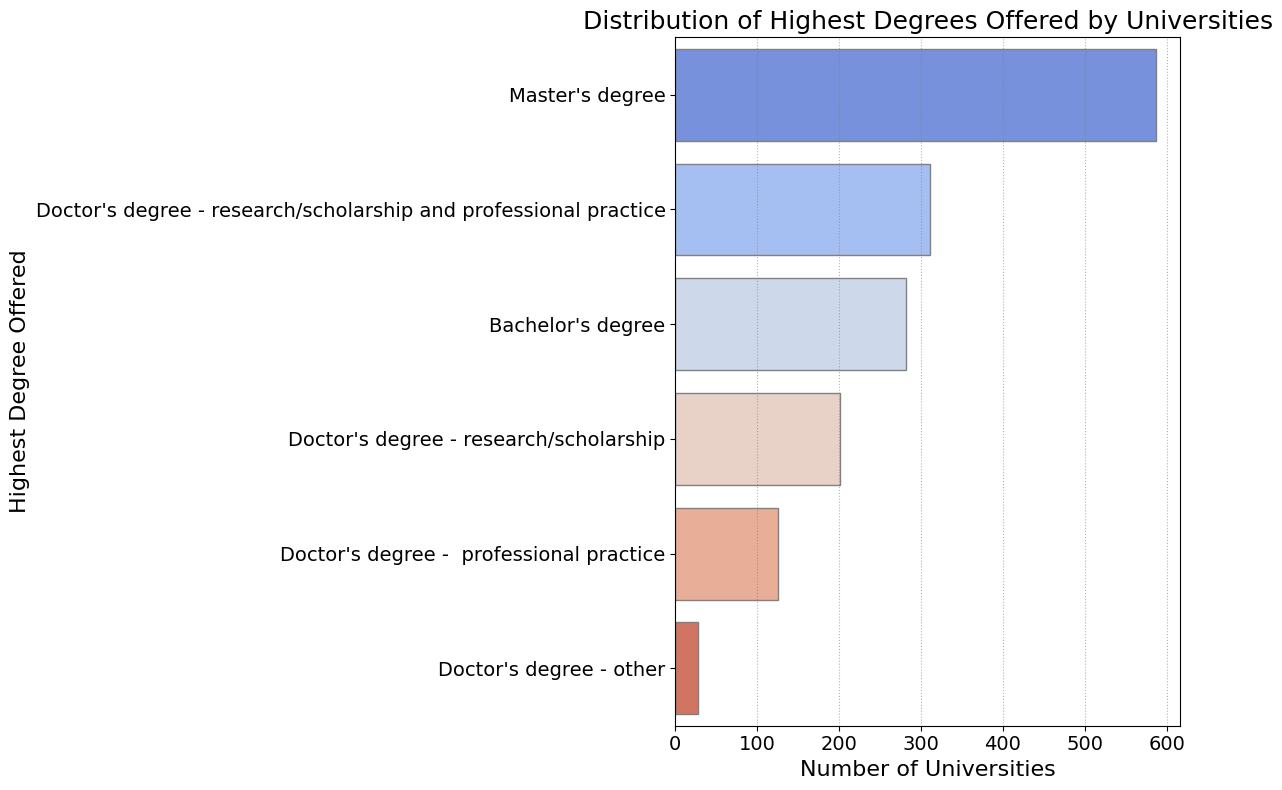

In [18]:
degree_data = df[['Name', 'Highest degree offered']]
degree_freq = degree_data['Highest degree offered'].value_counts().reset_index()
degree_freq.columns = ['Degree', 'Number of Universities']

palette = sns.color_palette("coolwarm", len(degree_freq))

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Universities', y='Degree', data=degree_freq, palette=palette, edgecolor='gray')

plt.title('Distribution of Highest Degrees Offered by Universities', fontsize=18)
plt.xlabel('Number of Universities', fontsize=16)
plt.ylabel('Highest Degree Offered', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='x', linestyle=':', color='gray', alpha=0.6)

plt.tight_layout()
plt.show()

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_12354/26519299.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Universities', y='Religious Affiliation', data=religion_freq, palette='viridis', edgecolor='gray')


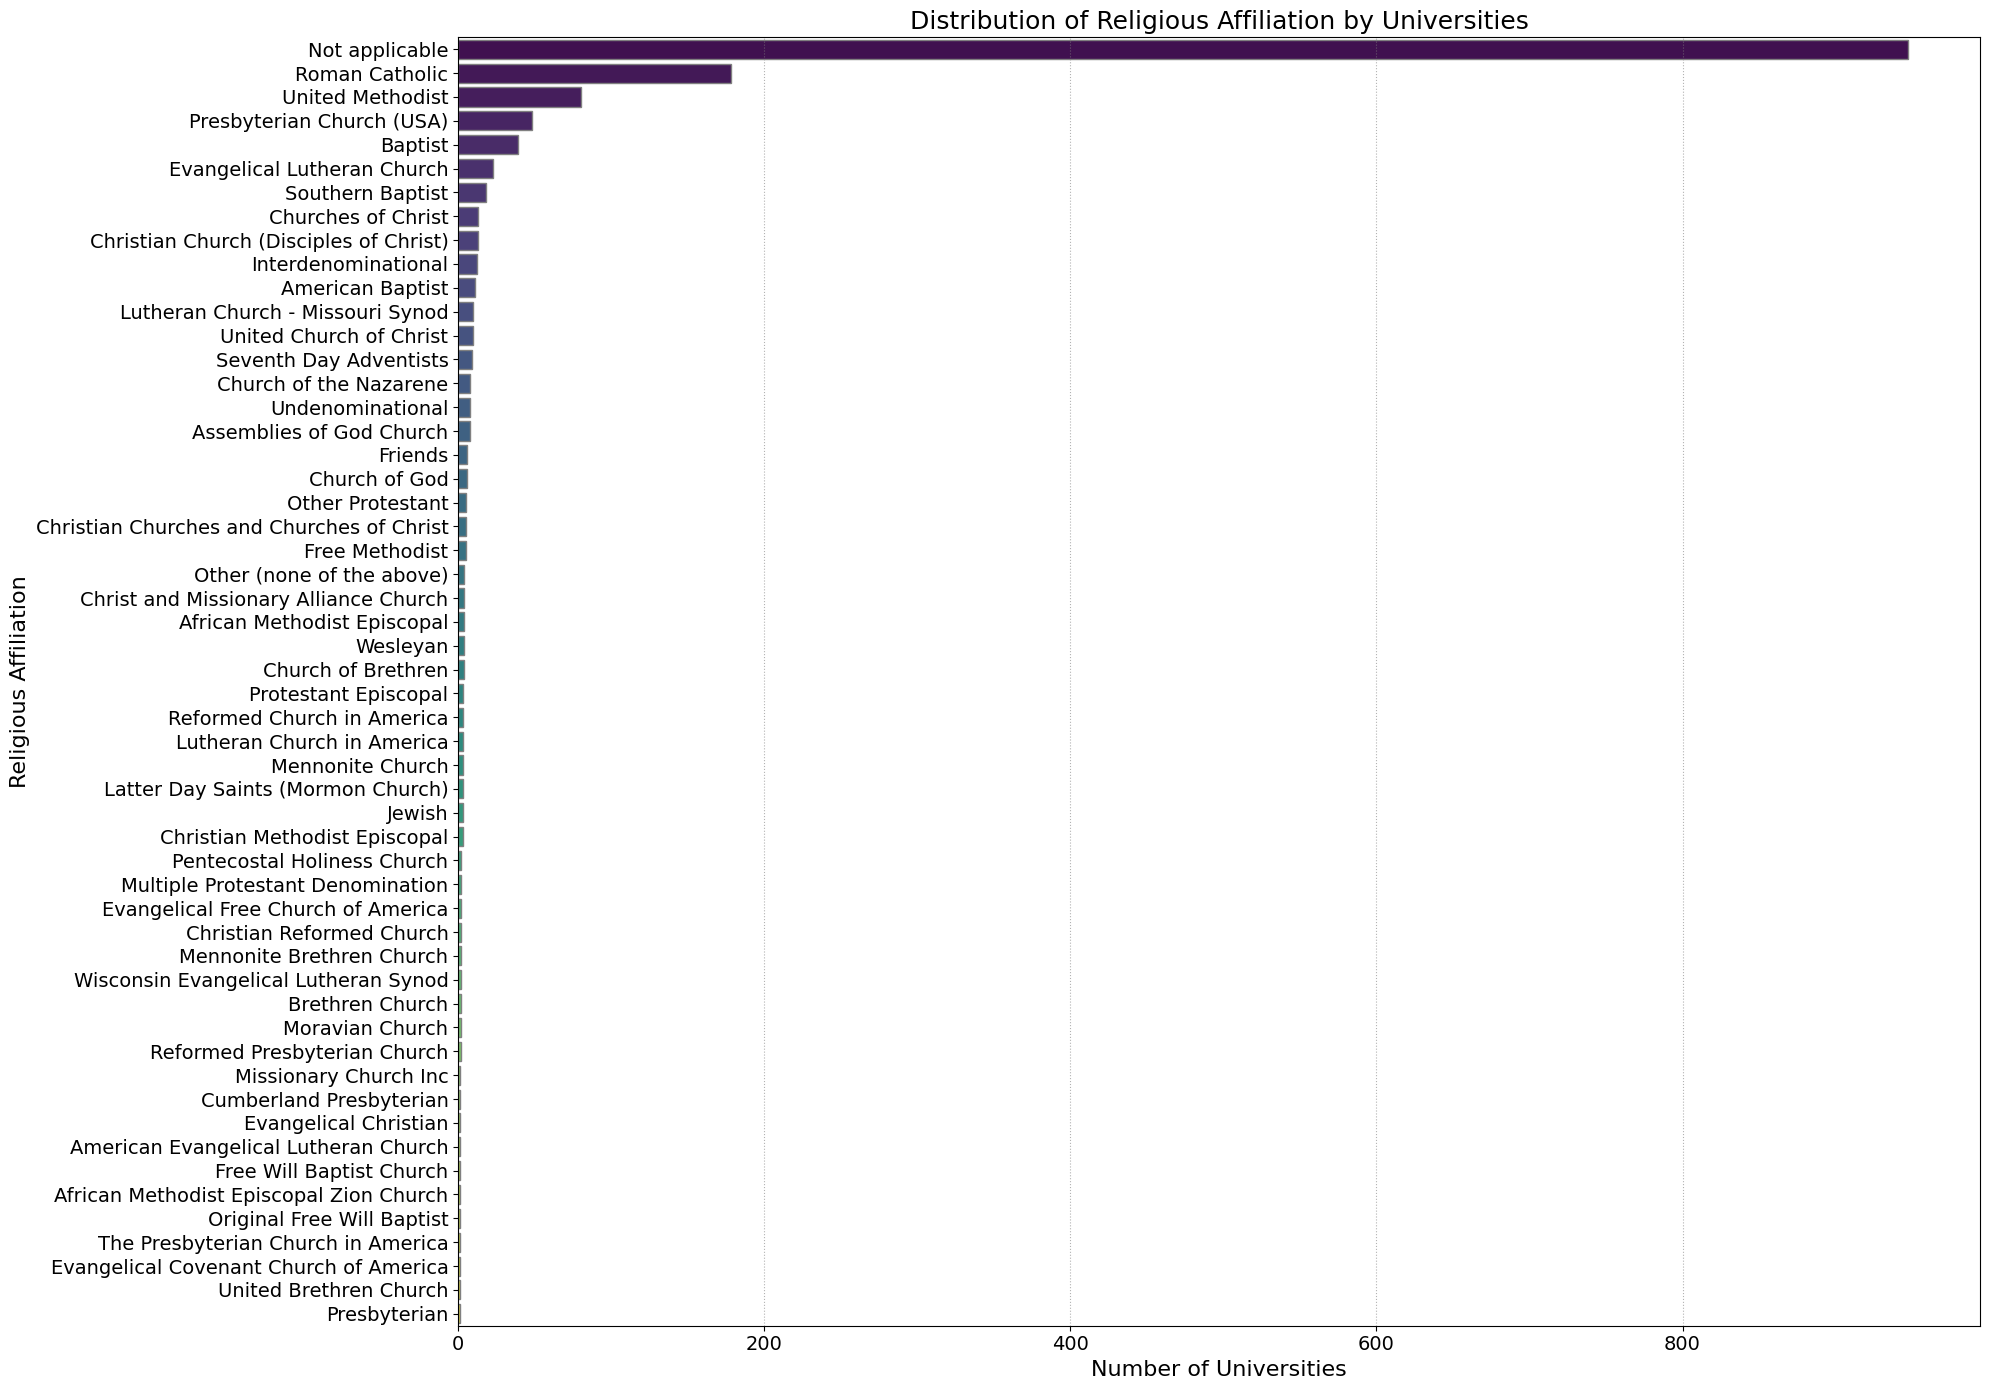

In [17]:
degree_data = df[['Name', 'Religious affiliation']]
religion_freq = degree_data['Religious affiliation'].value_counts().reset_index()
religion_freq.columns = ['Religious Affiliation', 'Number of Universities']

plt.figure(figsize=(20, 14))
sns.barplot(x='Number of Universities', y='Religious Affiliation', data=religion_freq, palette='viridis', edgecolor='gray')

plt.title('Distribution of Religious Affiliation by Universities', fontsize=18)
plt.xlabel('Number of Universities', fontsize=16)
plt.ylabel('Religious Affiliation', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='x', linestyle=':', color='gray', alpha=0.6)

plt.tight_layout()
plt.show()

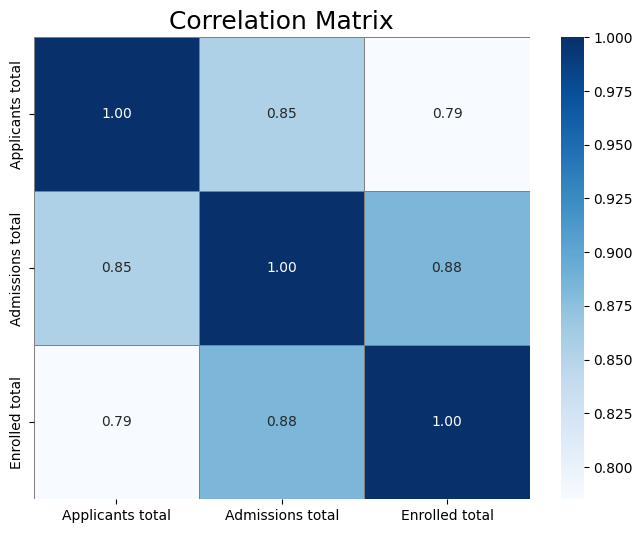

In [20]:
correlation_matrix = df[['Applicants total', 'Admissions total', 'Enrolled total']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='Blues', 
    fmt='.2f', 
    cbar=True, 
    linewidths=0.5, 
    linecolor='gray'
)
plt.title('Correlation Matrix', fontsize=18)
plt.show()

/var/folders/24/q63w584s5fngytmf3p7b72y40000gn/T/ipykernel_12354/2955587739.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Control of institution', data=df, palette='muted', edgecolor='black')


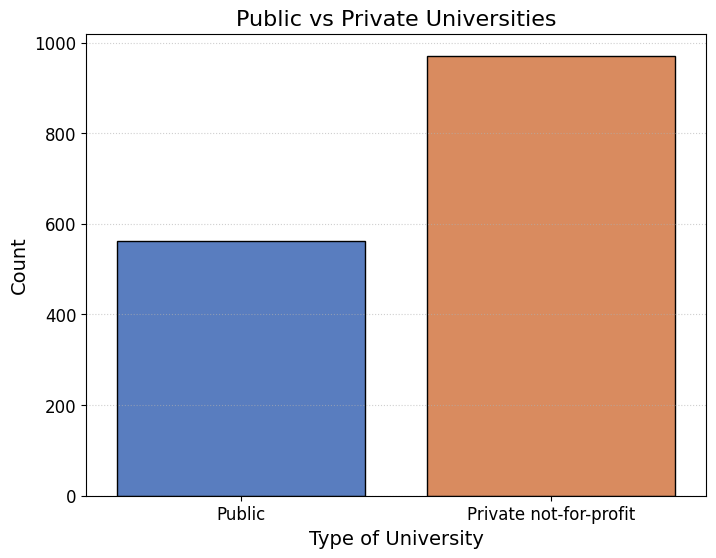

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Control of institution', data=df, palette='muted', edgecolor='black')

plt.title('Public vs Private Universities', fontsize=16)
plt.xlabel('Type of University', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.show()

## Data Prepration

Remove columns

In [35]:
df.drop([ "County name","Doctor's degrees - other awarded", 'Certificates of less than 1-year awarded', 'Certificates of 1 but less than 2-years awarded', 'Certificates of 2 but less than 4-years awarded', 'Postbaccalaureate certificates awarded', "Post-master's certificates awarded", "Number of students receiving an Associate's degree", "Number of students receiving a Bachelor's degree", "Number of students receiving a Master's degree", "Number of students receiving a Doctor's degree", 'Number of students receiving a certificate of less than 1-year', 'Number of students receiving a certificate of 1 but less than 4-years', "Number of students receiving a Postbaccalaureate or Post-master's certificate",'Estimated graduate enrollment, full time', 'Estimated graduate enrollment, part time', 'Estimated undergraduate enrollment, full time', 'Estimated undergraduate enrollment, part time','Estimated enrollment, total','Estimated enrollment, full time', 'Estimated enrollment, part time','ACT Composite 75th percentile score', 'SAT Writing 75th percentile score','SAT Math 75th percentile score','SAT Critical Reading 75th percentile score','ID number', 'year','Level of institution', 'Sector of institution', 'Tribal college', 'State abbreviation','ZIP code','SAT Critical Reading 25th percentile score', 'SAT Critical Reading 75th percentile score', 'SAT Math 25th percentile score', 'SAT Math 75th percentile score', 'SAT Writing 25th percentile score', 'SAT Writing 75th percentile score', 'ACT Composite 25th percentile score', 'ACT Composite 75th percentile score','Tuition and fees, 2010-11', 'Tuition and fees, 2011-12', 'Tuition and fees, 2012-13',"Longitude location of institution" , "Latitude location of institution","Religious affiliation" , "Offers Less than one year certificate" , "Offers One but less than two years certificate","Offers Associate's degree","Offers Two but less than 4 years certificate","Offers Other degree","Offers Doctor's degree - other" , "Estimated freshman enrollment, full time","Estimated freshman enrollment, part time","Historically Black College or University","Percent of total enrollment that are American Indian or Alaska Native","Full-time undergraduate enrollment","Part-time undergraduate enrollment" , "Percent of total enrollment that are Asian" ,"Percent of total enrollment that are Black or African American",'Graduation rate - Bachelor degree within 5 years, total','Graduation rate - Bachelor degree within 4 years, total','Percent of graduate enrollment that are Asian', 'Percent of graduate enrollment that are Black or African American', 'Percent of graduate enrollment that are Hispanic/Latino', 'Percent of graduate enrollment that are Native Hawaiian or Other Pacific Islander', 'Percent of graduate enrollment that are White', 'Percent of graduate enrollment that are two or more races', 'Percent of graduate enrollment that are Race/ethnicity unknown', 'Percent of graduate enrollment that are Nonresident Alien', 'Percent of graduate enrollment that are Asian/Native Hawaiian/Pacific Islander', 'Percent of graduate enrollment that are women' , 'Percent of total enrollment that are Hispanic/Latino','Percent of total enrollment that are Native Hawaiian or Other Pacific Islander'], axis=1, inplace=True)

In [37]:
df.drop(['Percent of total enrollment that are White','Percent of total enrollment that are two or more races','Percent of total enrollment that are Race/ethnicity unknown' ,'Percent of total enrollment that are Nonresident Alien' , 'Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander','Percent of total enrollment that are women','Percent of undergraduate enrollment that are Black or African American'], axis=1, inplace=True)

In [38]:
df.drop(['Percent of undergraduate enrollment that are American Indian or Alaska Native', 'Percent of undergraduate enrollment that are Asian', 'Percent of undergraduate enrollment that are Hispanic/Latino', 'Percent of undergraduate enrollment that are Native Hawaiian or Other Pacific Islander', 'Percent of undergraduate enrollment that are White', 'Percent of undergraduate enrollment that are two or more races', 'Percent of undergraduate enrollment that are Race/ethnicity unknown', 'Percent of undergraduate enrollment that are Nonresident Alien', 'Percent of undergraduate enrollment that are Asian/Native Hawaiian/Pacific Islander', 'Percent of undergraduate enrollment that are women', 'Percent of graduate enrollment that are American Indian or Alaska Native'],axis=1, inplace=True)

Missing values

In [42]:
df = df.drop(index=1308)
df = df.drop(index=257)

In [43]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [44]:
print(df.isnull().sum())

Name                                                                              0
Highest degree offered                                                            0
Offers Bachelor's degree                                                          0
Offers Postbaccalaureate certificate                                              0
Offers Master's degree                                                            0
Offers Post-master's certificate                                                  0
Offers Doctor's degree - research/scholarship                                     0
Offers Doctor's degree - professional practice                                    0
Applicants total                                                                  0
Admissions total                                                                  0
Enrolled total                                                                    0
Percent of freshmen submitting SAT scores                                   

Encoding

In [46]:
#detecting categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Name', 'Highest degree offered', 'Offers Bachelor's degree',
       'Offers Postbaccalaureate certificate', 'Offers Master's degree',
       'Offers Post-master's certificate',
       'Offers Doctor's degree - research/scholarship',
       'Offers Doctor's degree - professional practice', 'FIPS state code',
       'Geographic region', 'Control of institution',
       'Degree of urbanization (Urban-centric locale)',
       'Carnegie Classification 2010: Basic'],
      dtype='object')


In [50]:
label_encoder = LabelEncoder()
for i in categorical_columns :
    df[i] = label_encoder.fit_transform(df[i])

outliers

In [51]:
num_cols = ['Applicants total' , 'Admissions total' , 'Enrolled total' , 'Percent of freshmen submitting SAT scores' , 'Percent of freshmen submitting ACT scores'
            , 'Estimated undergraduate enrollment, total' , 'Estimated freshman undergraduate enrollment, total' , 'Estimated graduate enrollment, total'
            ,'Associate\'s degrees awarded' , 'Bachelor\'s degrees awarded' , 'Master\'s degrees awarded' , 'Doctor\'s degrese - research/scholarship awarded'
            , 'Doctor\'s degrees - professional practice awarded', 'Full-time enrollment' , 'Part-time enrollment' , 'Undergraduate enrollment','Graduate enrollment','Number of first-time undergraduates - in-state'
            ,'Percent of first-time undergraduates - in-state','Number of first-time undergraduates - out-of-state'
            ,'Percent of first-time undergraduates - out-of-state']

In [53]:
for i in num_cols:
    df[i] = df[i].clip(lower=df[i].quantile(0.05), upper=df[i].quantile(0.95))